In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [305]:
data = pd.read_csv("pumpoo.csv")
data.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [306]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

In [307]:
data.isnull().sum()


Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [308]:
print(data.columns)

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')


In [309]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [310]:
X.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  
0       0.8207  
1       0.7487  
2       0.6929  
3       0.7624  
4       0.7557

In [311]:
y.head()

0    Çerçevelik
1    Çerçevelik
2    Çerçevelik
3    Çerçevelik
4    Çerçevelik
Name: Class, dtype: object

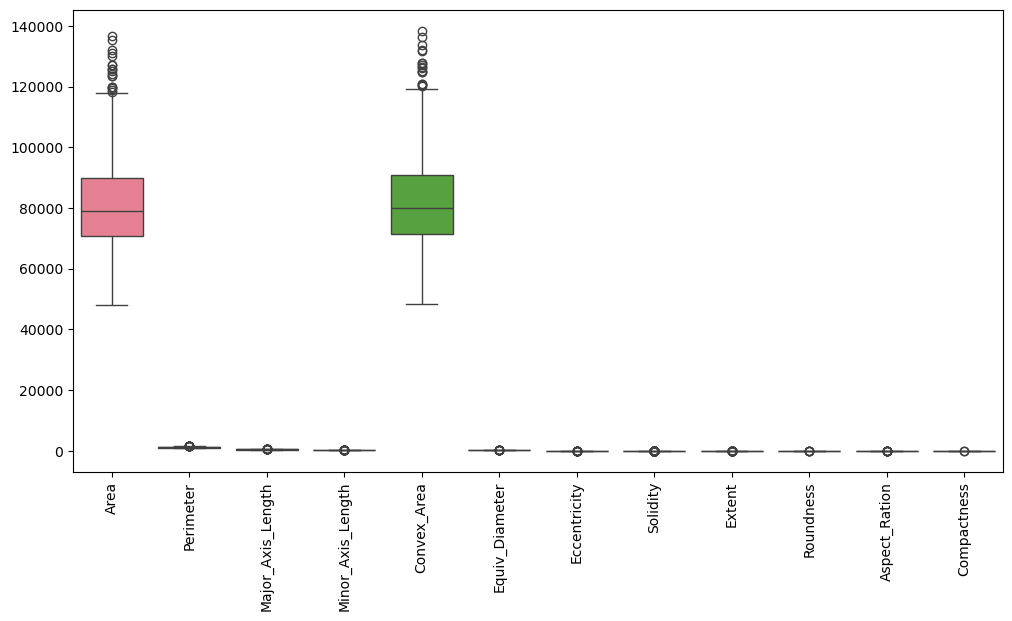

In [312]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

In [313]:
 X = X.drop(["Extent"], axis=1)

In [314]:
X.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902     0.8963         1.4809   
1        312.3614        0.8275    0.9916     0.8440         1.7811   
2        301.9822        0.8749    0.9857     0.7674         2.0651   
3        290.8899        0.8123    0.9902     0.8486         1.7146   
4        290.1207        0.8187    0.9850     0.8338         1.7413   

   Compactness  
0       0.8207  
1       0.7487  
2       0.6929  
3       0.7624  
4       0.7557

In [315]:
y.head()

0    Çerçevelik
1    Çerçevelik
2    Çerçevelik
3    Çerçevelik
4    Çerçevelik
Name: Class, dtype: object

In [316]:
# Dropping target column from dataset
X = data.drop(columns=["Class"])

# Target column
y = data["Class"]

# Check result
print("Input features shape:", X.shape)
print("Target shape:", y.shape)

Input features shape: (2500, 12)
Target shape: (2500,)


In [317]:
# Descriptive statistics
data.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

In [318]:
data.describe(include='all')

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count     2500.000000  2500.000000        2500.000000        2500.000000   
unique            NaN          NaN                NaN                NaN   
top               NaN          NaN                NaN                NaN   
freq              NaN          NaN                NaN                NaN   
mean     80658.220800  1130.279015         456.601840         225.794921   
std      13664.510228   109.256418          56.235704          23.297245   
min      47939.000000   868.485000         320.844600         152.171800   
25%      70765.000000  1048.829750         414.957850         211.245925   
50%      79076.000000  1123.672000         449.496600         224.703100   
75%      89757.500000  1203.340500         492.737650         240.672875   
max     136574.000000  1559.450000         661.911300         305.818000   

          Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count     2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
unique            NaN             NaN           NaN          NaN          NaN   
top               NaN             NaN           NaN          NaN          NaN   
freq              NaN             NaN           NaN          NaN          NaN   
mean     81508.084400      319.334230      0.860879     0.989492     0.693205   
std      13764.092788       26.891920      0.045167     0.003494     0.060914   
min      48366.000000      247.058400      0.492100     0.918600     0.468000   
25%      71512.000000      300.167975      0.831700     0.988300     0.658900   
50%      79872.000000      317.305350      0.863700     0.990300     0.713050   
75%      90797.750000      338.057375      0.897025     0.991500     0.740225   
max     138384.000000      417.002900      0.948100     0.994400     0.829600   

          Roundness  Aspect_Ration  Compactness       Class  
count   2500.000000    2500.000000  2500.000000        2500  
unique          NaN            NaN          NaN           2  
top             NaN            NaN          NaN  Çerçevelik  
freq            NaN            NaN          NaN        1300  
mean       0.791533       2.041702     0.704121         NaN  
std        0.055924       0.315997     0.053067         NaN  
min        0.554600       1.148700     0.560800         NaN  
25%        0.751900       1.801050     0.663475         NaN  
50%        0.797750       1.984200     0.707700         NaN  
75%        0.834325       2.262075     0.743500         NaN  
max        0.939600       3.144400     0.904900         NaN

In [319]:
data.info

<bound method DataFrame.info of        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidit

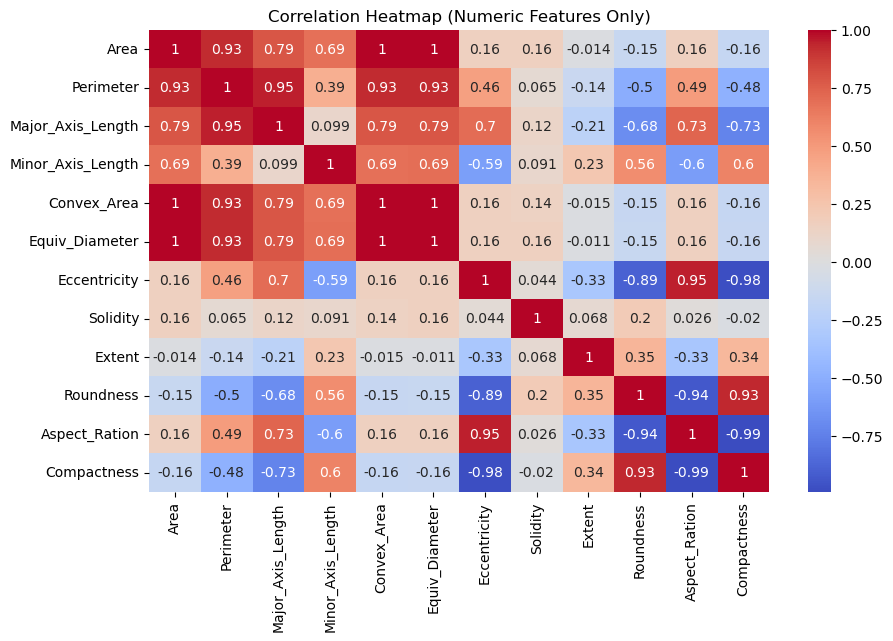

In [320]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data.drop("Class", axis=1).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

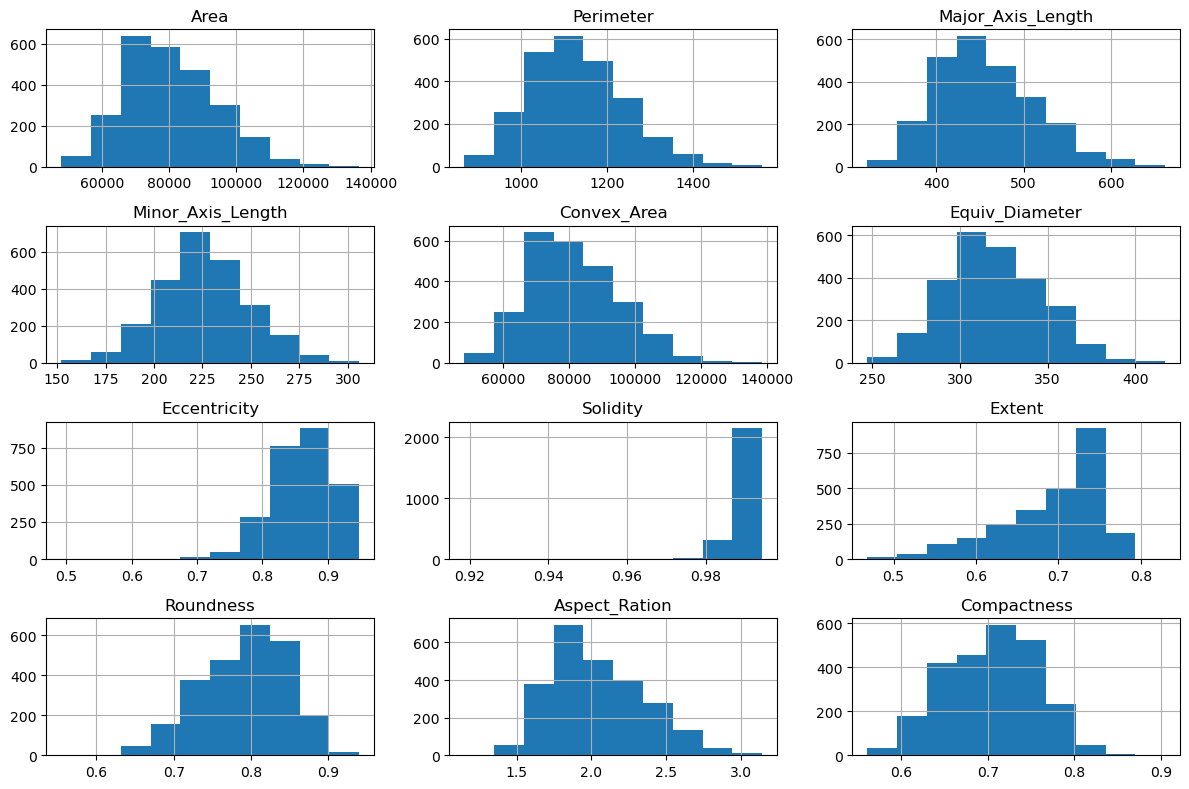

In [321]:
data.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

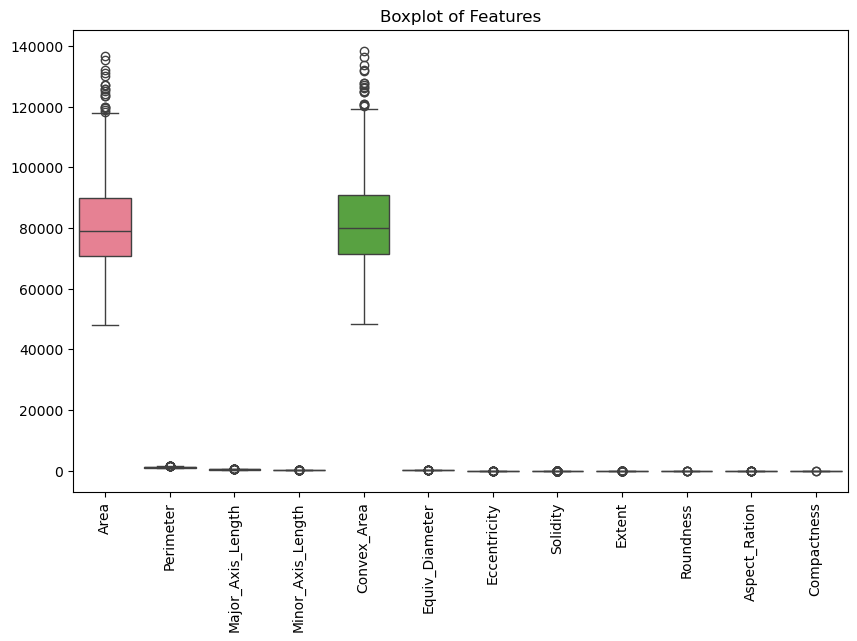

In [322]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.drop("Class", axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

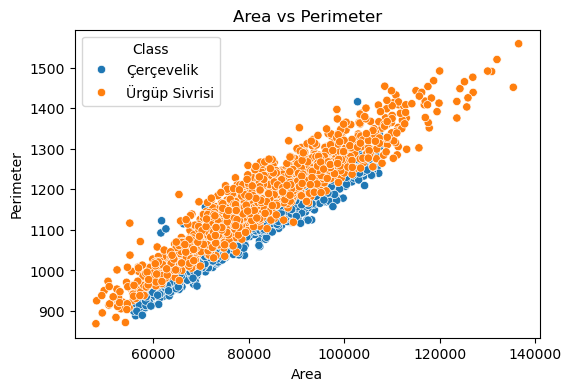

In [323]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Area",
    y="Perimeter",
    hue="Class",
    data=data
)
plt.title("Area vs Perimeter")
plt.show()

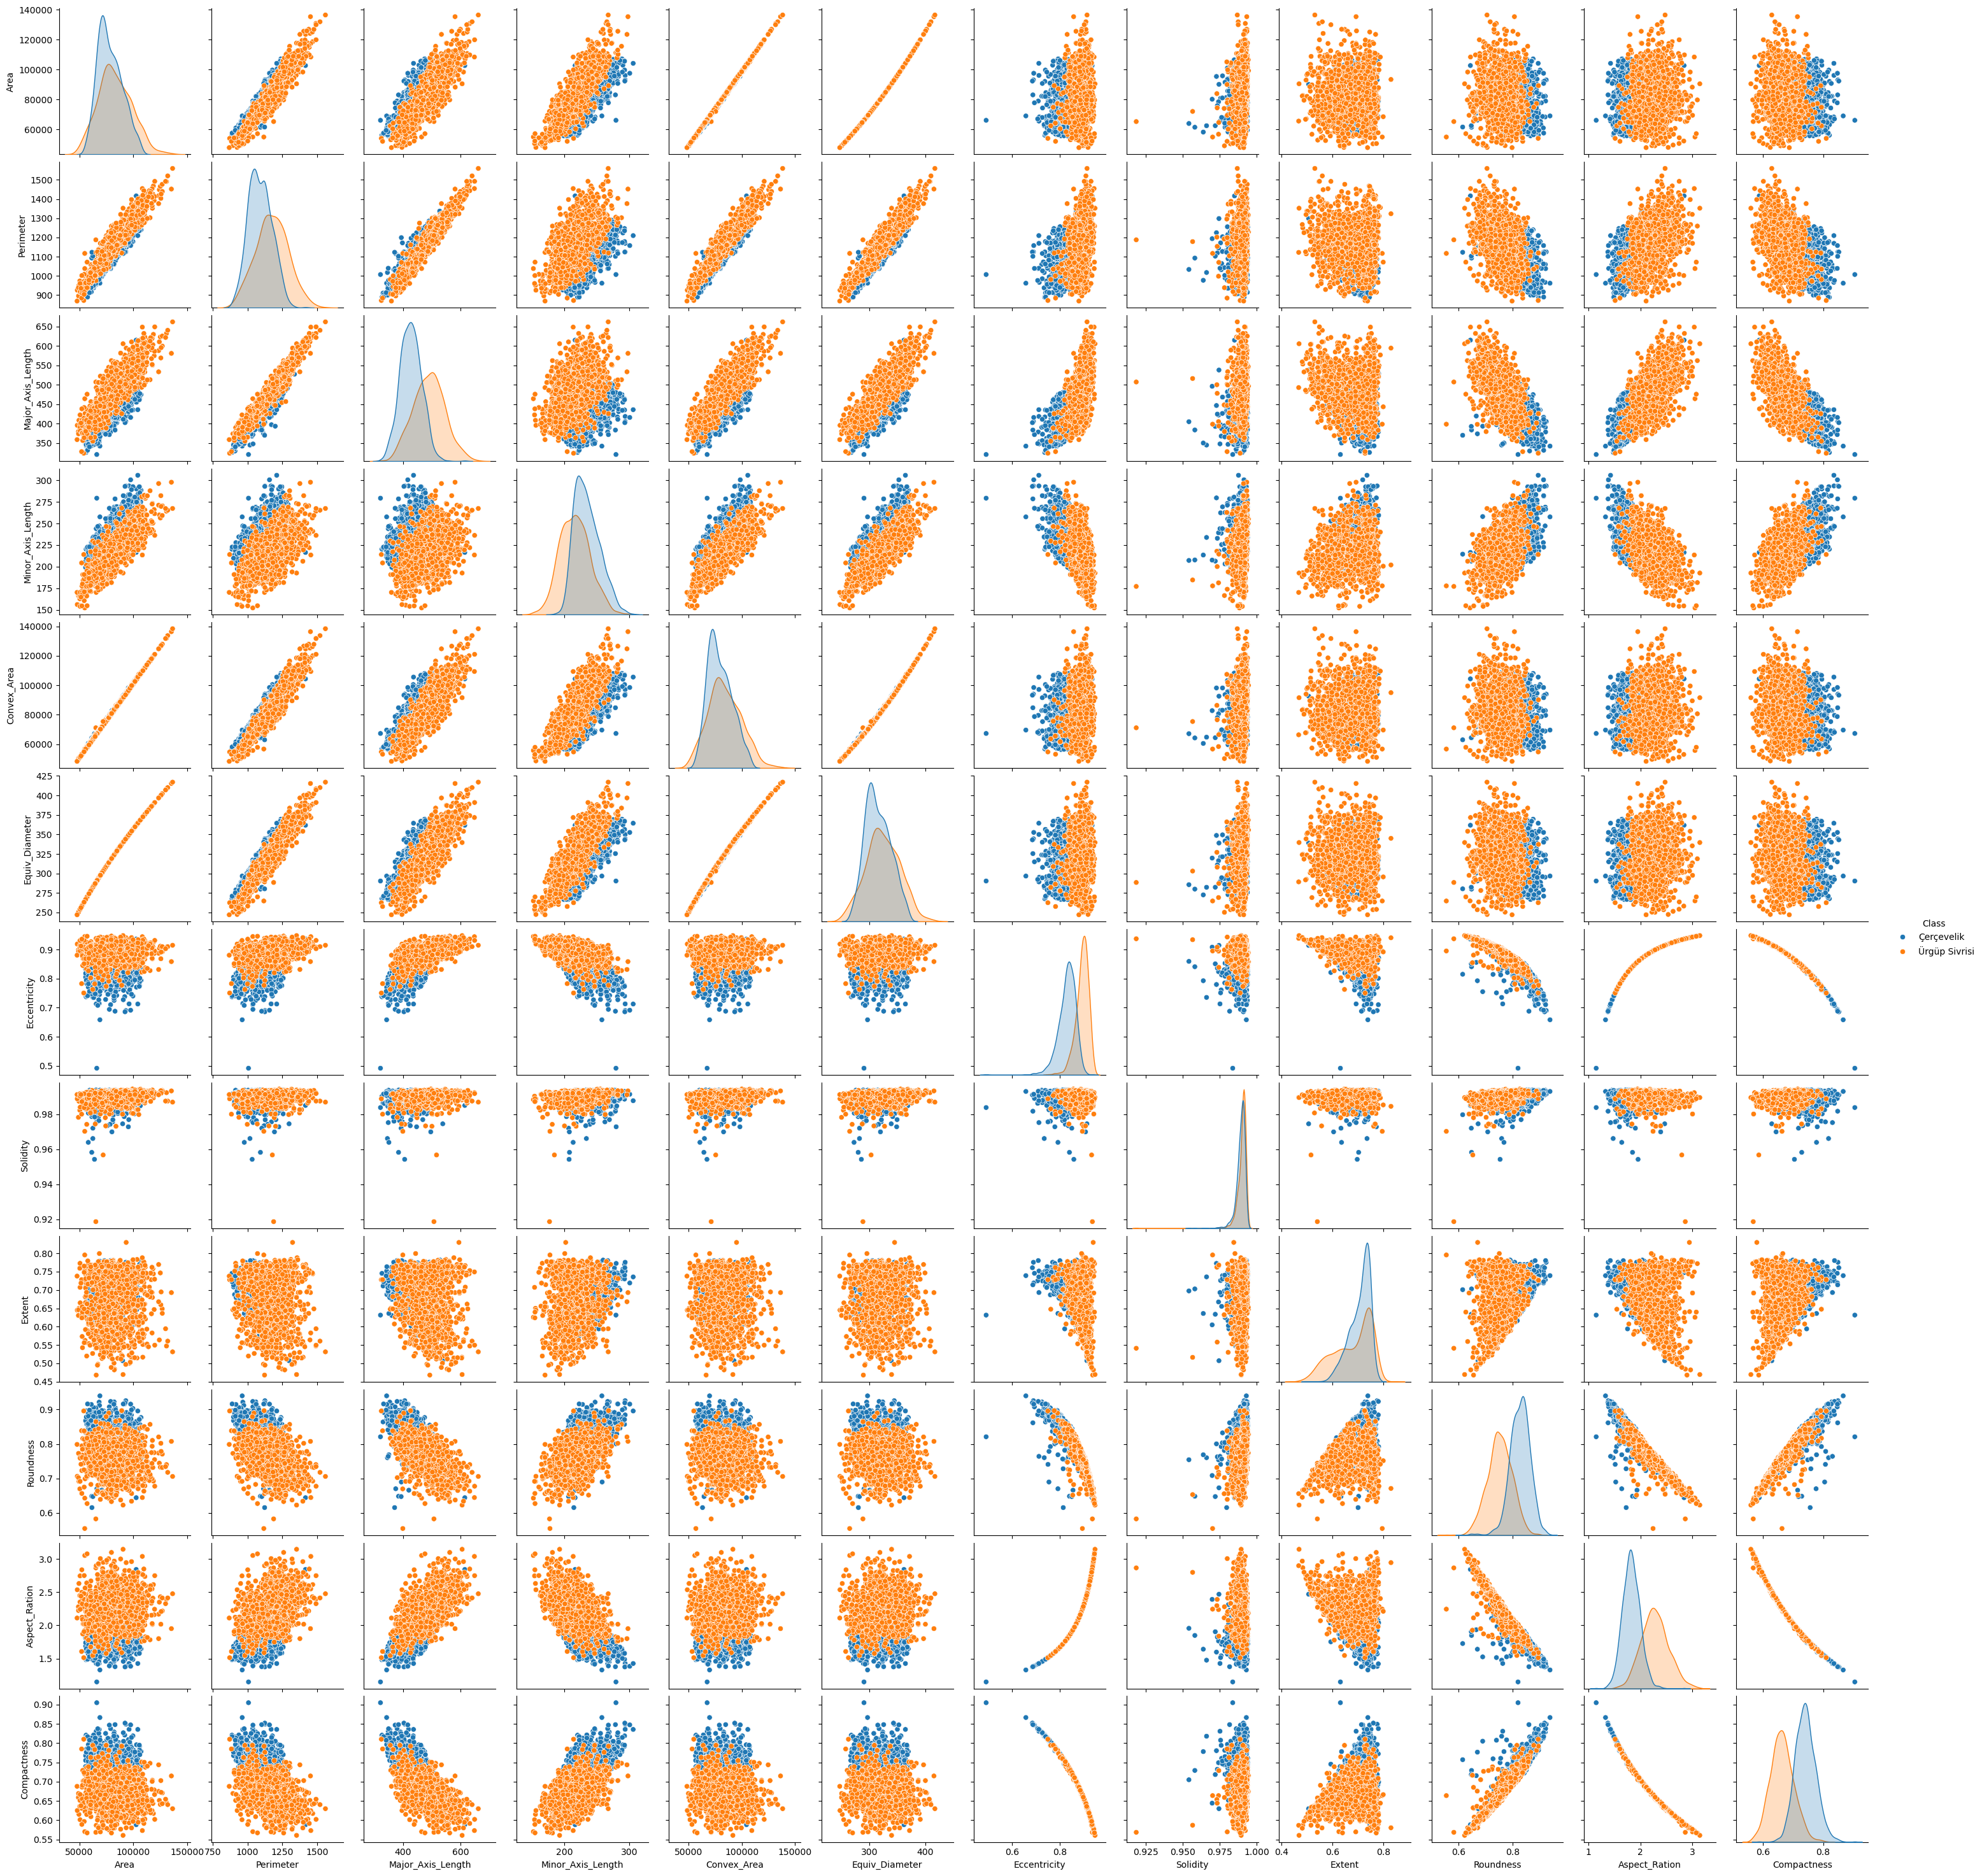

In [324]:
sns.pairplot(data, hue="Class")
plt.show()

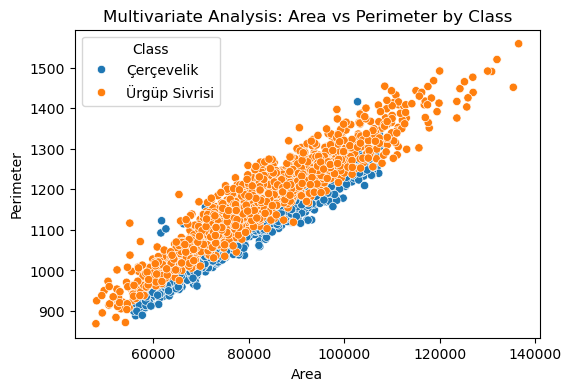

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Area",
    y="Perimeter",
    hue="Class",
    data=data
)
plt.title("Multivariate Analysis: Area vs Perimeter by Class")
plt.show()

In [326]:
data["Compactness"] = pd.to_numeric(data["Compactness"], errors="coerce")

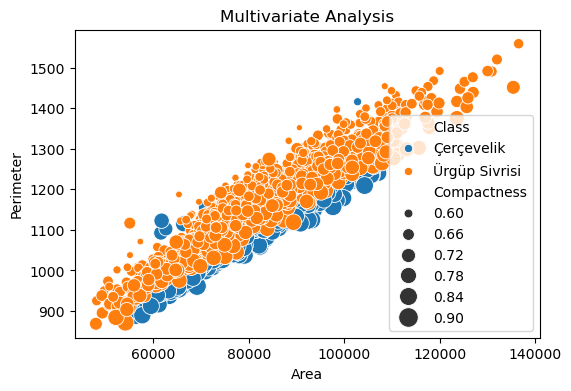

In [327]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Area",
    y="Perimeter",
    size="Compactness",
    hue="Class",
    data=data,
    sizes=(20,200)
)
plt.title("Multivariate Analysis")
plt.show()

In [328]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [329]:
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])

In [330]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [331]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [333]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [334]:
y_pred = log_reg.predict(X_test)

In [335]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.856


In [336]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[224  27]
 [ 45 204]]


In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [338]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [339]:
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully")

Random Forest Model Trained Successfully


In [340]:
y_pred_rf = rf_model.predict(X_test)

In [341]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.866


In [342]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[219  32]
 [ 35 214]]


In [343]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       251
           1       0.87      0.86      0.86       249

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [345]:
dt_model = DecisionTreeClassifier(
    criterion="gini",      
    max_depth=5,           
    random_state=42
)

In [346]:
dt_model.fit(X_train, y_train)
print("Decision Tree Model Trained Successfully")

Decision Tree Model Trained Successfully


In [347]:
y_pred_dt = dt_model.predict(X_test)

In [348]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.848


In [349]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
[[221  30]
 [ 46 203]]


In [350]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       251
           1       0.87      0.82      0.84       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [351]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [352]:
scaler = MinMaxScaler()
X_train_mnb = scaler.fit_transform(X_train)
X_test_mnb = scaler.transform(X_test)

In [353]:
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
print("Multinomial Naive Bayes Model Trained Successfully")

Multinomial Naive Bayes Model Trained Successfully


In [354]:
y_pred_mnb = mnb.predict(X_test_mnb)

In [355]:
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.82
[[235  16]
 [ 74 175]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       251
           1       0.92      0.70      0.80       249

    accuracy                           0.82       500
   macro avg       0.84      0.82      0.82       500
weighted avg       0.84      0.82      0.82       500



In [356]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [359]:
svm_model = SVC(kernel="linear", random_state=42)

In [360]:
svm_model.fit(X_train, y_train)
print("SVM Model Trained Successfully")

SVM Model Trained Successfully


In [361]:
y_pred_svm = svm_model.predict(X_test)

In [362]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.856


In [363]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[226  25]
 [ 47 202]]


In [364]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       251
           1       0.89      0.81      0.85       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [365]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [366]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [367]:
gb_model.fit(X_train, y_train)
print("Gradient Boosting Model Trained Successfully")

Gradient Boosting Model Trained Successfully


In [368]:
y_pred_gb = gb_model.predict(X_test)

In [369]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.876


In [370]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Confusion Matrix:
[[225  26]
 [ 36 213]]


In [371]:
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       251
           1       0.89      0.86      0.87       249

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [372]:
y_pred = rf_model.predict(X_test)

In [373]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.866


In [374]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[219  32]
 [ 35 214]]


In [375]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       251
           1       0.87      0.86      0.86       249

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [376]:
y_pred = gb_model.predict(X_test)

In [377]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.876


In [378]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[225  26]
 [ 36 213]]


In [379]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       251
           1       0.89      0.86      0.87       249

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [380]:
y_pred = log_reg.predict(X_test)

In [381]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.856


In [382]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[224  27]
 [ 45 204]]


In [383]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       251
           1       0.88      0.82      0.85       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [384]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [385]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.856


In [386]:
precision = precision_score(y_test, y_pred, average='weighted')
print("precision:",precision)

precision: 0.8578145126249215


In [387]:
recall= recall_score(y_test, y_pred, average='weighted')
print("recall:",recall)

recall: 0.856


In [388]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 score:", f1 )


f1 score: 0.8557923076923077


In [389]:
print("Model Testing Metrics")
print("---------------------")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("recall   :", recall)
print("F1 score :", f1)

Model Testing Metrics
---------------------
Accuracy : 0.856
Precision: 0.8578145126249215
recall   : 0.856
F1 score : 0.8557923076923077


In [390]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[224  27]
 [ 45 204]]


In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
import pandas as pd

In [392]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model 4: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Model 5: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Model 6: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [393]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model 4: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Model 5: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Model 6: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [394]:
y_pred_lr  = lr_model.predict(X_test)
y_pred_dt  = dt_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_gb  = gb_model.predict(X_test)
y_pred_nb  = nb_model.predict(X_test)
print("All predictions done")

All predictions done


In [395]:
acc_lr  = accuracy_score(y_test, y_pred_lr)
acc_dt  = accuracy_score(y_test, y_pred_dt)
acc_rf  = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_gb  = accuracy_score(y_test, y_pred_gb)
acc_nb  = accuracy_score(y_test, y_pred_nb)

print("Accuracy calculated")

Accuracy calculated


In [396]:
accuracy_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Support Vector Machine",
        "Gradient Boosting",
        "Naive Bayes"
    ],
    "Accuracy": [
        acc_lr,
        acc_dt,
        acc_rf,
        acc_svm,
        acc_gb,
        acc_nb
    ]
})

print(accuracy_df)

                    Model  Accuracy
0     Logistic Regression     0.856
1           Decision Tree     0.816
2           Random Forest     0.866
3  Support Vector Machine     0.868
4       Gradient Boosting     0.876
5             Naive Bayes     0.834


In [397]:
import joblib

joblib.dump(rf_model, "pumpkin_seed_model.pkl")
print("Model saved successfully")

Model saved successfully


In [398]:
import joblib

loaded_model = joblib.load("pumpkin_seed_model.pkl")
print("Model loaded")

Model loaded


In [399]:
print(type(loaded_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [400]:
import numpy as np

# Suppose your model has 7 features
new_seed_data = np.array([4170, 260, 110, 45, 0.85, 4300, 0.72]).reshape(1, -1)

print("Input shape:", new_seed_data.shape)

Input shape: (1, 7)


Any NaN in input? False
Datatype: float64
